In [1]:
import pandas as pd
import numpy as np

# Xử lý dữ liệu

In [2]:
df = pd.read_csv('cophieuvnindex.csv')

In [3]:
df = df.set_index('Ngày')

In [4]:
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

In [5]:
df.sort_index(ascending=True, inplace=True)

In [6]:
df

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2000-07-31,101.55,101.55,101.55,101.55,0.01K,1.55%
2000-08-02,103.38,103.38,103.38,103.38,NaN,1.80%
2000-08-04,105.20,105.20,105.20,105.20,0.00K,1.76%
2000-08-07,106.92,106.92,106.92,106.92,0.01K,1.63%
2000-08-09,108.64,108.64,108.64,108.64,0.02K,1.61%
...,...,...,...,...,...,...
2022-11-11,954.53,947.24,966.70,947.24,736.49K,0.77%
2022-11-14,941.04,954.53,954.53,923.53,666.06K,-1.41%
2022-11-15,911.90,941.04,941.04,900.17,692.34K,-3.10%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5414 entries, 2000-07-31 to 2022-11-17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lần cuối    5414 non-null   float64
 1   Mở          5414 non-null   float64
 2   Cao         5414 non-null   float64
 3   Thấp        5414 non-null   float64
 4   KL          5407 non-null   object 
 5   % Thay đổi  5414 non-null   object 
dtypes: float64(4), object(2)
memory usage: 296.1+ KB


### Tiến hành loại trường "Thay đổi"

In [8]:
df = df.iloc[:, df.columns != '% Thay đổi']

In [9]:
df.head()

,Lần cuối,Mở,Cao,Thấp,KL
Ngày,,,,,
2000-07-31,101.55,101.55,101.55,101.55,0.01K
2000-08-02,103.38,103.38,103.38,103.38,NaN
2000-08-04,105.20,105.20,105.20,105.20,0.00K
2000-08-07,106.92,106.92,106.92,106.92,0.01K
2000-08-09,108.64,108.64,108.64,108.64,0.02K


### Thay đổi kiểu dữ liệu

In [10]:
df[['Lần cuối', 'Mở', 'Cao', 'Thấp']] = df[['Lần cuối', 'Mở', 'Cao', 'Thấp']].astype(np.float64)


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5414 entries, 2000-07-31 to 2022-11-17
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lần cuối  5414 non-null   float64
 1   Mở        5414 non-null   float64
 2   Cao       5414 non-null   float64
 3   Thấp      5414 non-null   float64
 4   KL        5407 non-null   object 
dtypes: float64(4), object(1)
memory usage: 253.8+ KB


In [12]:
df.columns

Index(['Lần cuối', 'Mở', 'Cao', 'Thấp', 'KL'], dtype='object')

Thay các giá trị nan của Khối lượng bằng 0

In [13]:
df['KL'].fillna(0, inplace = True)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


# Thay "k" = x1000, "m" = x1000000

In [14]:
for i in range(0, len(df)):
    try:
        if df['KL'][i][-1] == 'K':
            df['KL'][i] = np.float64(df['KL'][i][0: -2]) * 1000
        elif df['KL'][i][-1] == 'M':
            df['KL'][i] = np.float64(df['KL'][i][0: -2]) * 1000000
    except:
        df['KL'][i] = np.float64(df['KL'][i])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12456\524800449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KL'][i] = np.float64(df['KL'][i][0: -2]) * 1000
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12456\524800449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KL'][i] = np.float64(df['KL'][i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12456\524800449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KL'][i] = np

In [15]:
df[['KL']] = df[['KL']].astype(np.float64)


In [16]:
df.head()

,Lần cuối,Mở,Cao,Thấp,KL
Ngày,,,,,
2000-07-31,101.55,101.55,101.55,101.55,0.0
2000-08-02,103.38,103.38,103.38,103.38,0.0
2000-08-04,105.20,105.20,105.20,105.20,0.0
2000-08-07,106.92,106.92,106.92,106.92,0.0
2000-08-09,108.64,108.64,108.64,108.64,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5414 entries, 2000-07-31 to 2022-11-17
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lần cuối  5414 non-null   float64
 1   Mở        5414 non-null   float64
 2   Cao       5414 non-null   float64
 3   Thấp      5414 non-null   float64
 4   KL        5414 non-null   float64
dtypes: float64(5)
memory usage: 253.8 KB


# Phân tích dữ liệu

### Thống kê dữ liệu

In [18]:
df.describe()

,Lần cuối,Mở,Cao,Thấp,KL
count,5414.000000,5414.000000,5414.000000,5414.000000,5.414000e+03
mean,608.285940,608.434409,612.016114,604.512396,2.314083e+05
std,337.847217,338.017273,340.359217,335.084944,3.216870e+06
min,101.550000,101.550000,101.550000,101.550000,0.000000e+00
25%,366.695000,366.810000,369.660000,365.175000,4.200000e+03
50%,525.835000,526.285000,529.510000,522.490000,5.035000e+04
75%,891.657500,891.820000,897.332500,885.330000,1.604500e+05
max,1528.570000,1534.100000,1536.450000,1524.960000,1.212000e+08


### Biểu đồ dữ liệu ở quá khữ

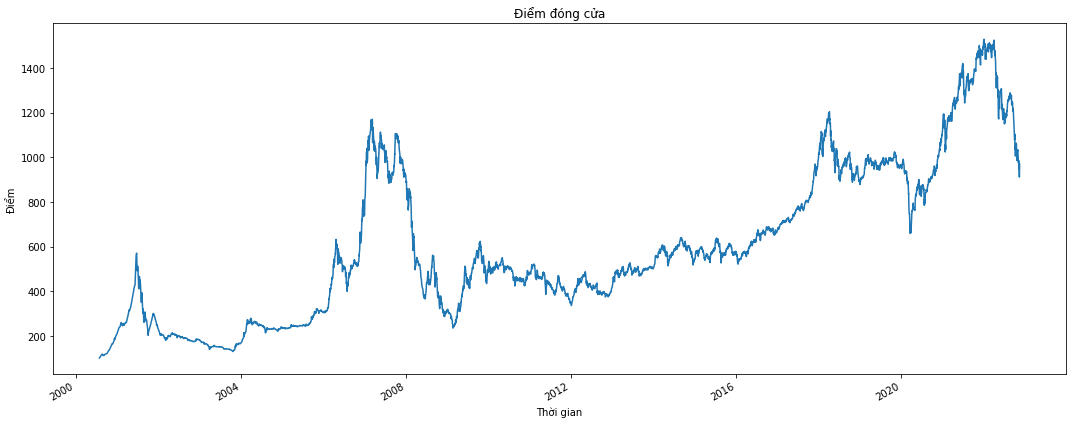

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

df['Lần cuối'].plot()
plt.ylabel('Điểm')
plt.xlabel('Thời gian')
plt.title(f"Điểm đóng cửa")

plt.tight_layout()

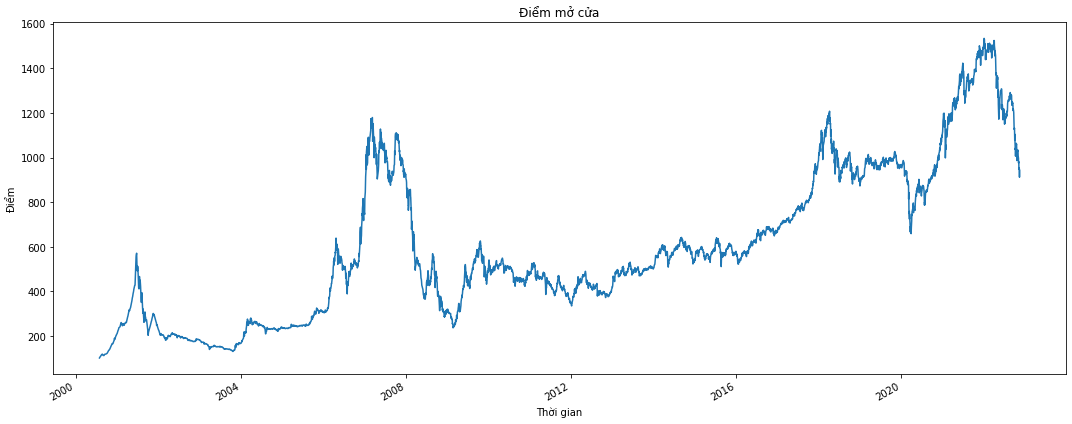

In [20]:
plt.figure(figsize=(15, 6))

df['Mở'].plot()
plt.ylabel('Điểm')
plt.xlabel('Thời gian')
plt.title(f"Điểm mở cửa")

plt.tight_layout()

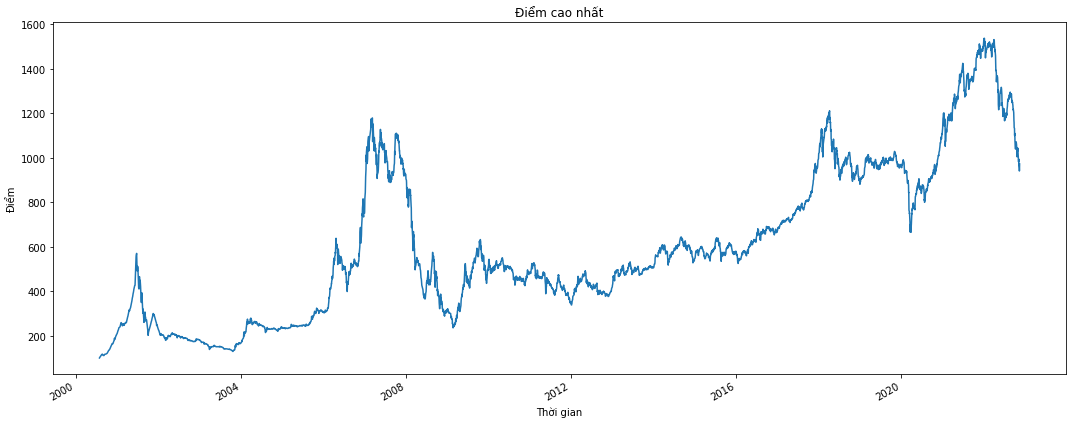

In [21]:
plt.figure(figsize=(15, 6))

df['Cao'].plot()
plt.ylabel('Điểm')
plt.xlabel('Thời gian')
plt.title(f"Điểm cao nhất")

plt.tight_layout()

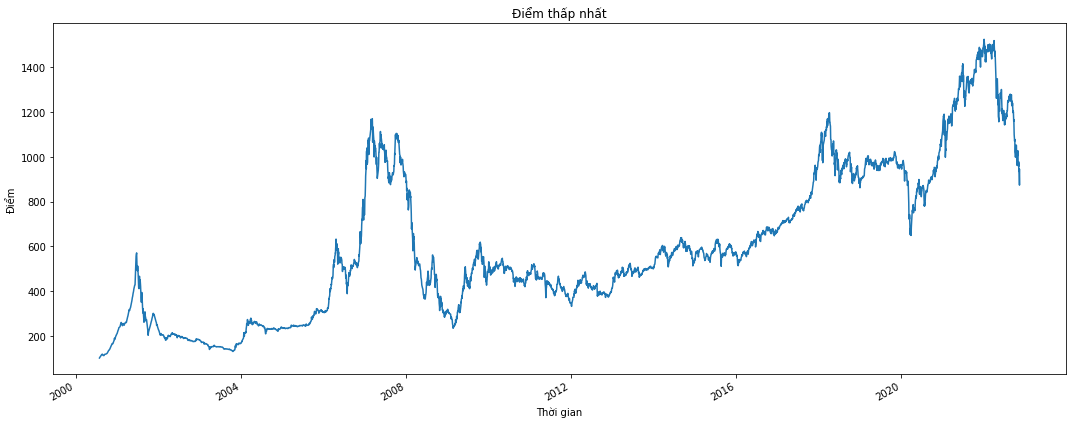

In [22]:
plt.figure(figsize=(15, 6))

df['Thấp'].plot()
plt.ylabel('Điểm')
plt.xlabel('Thời gian')
plt.title(f"Điểm thấp nhất")

plt.tight_layout()

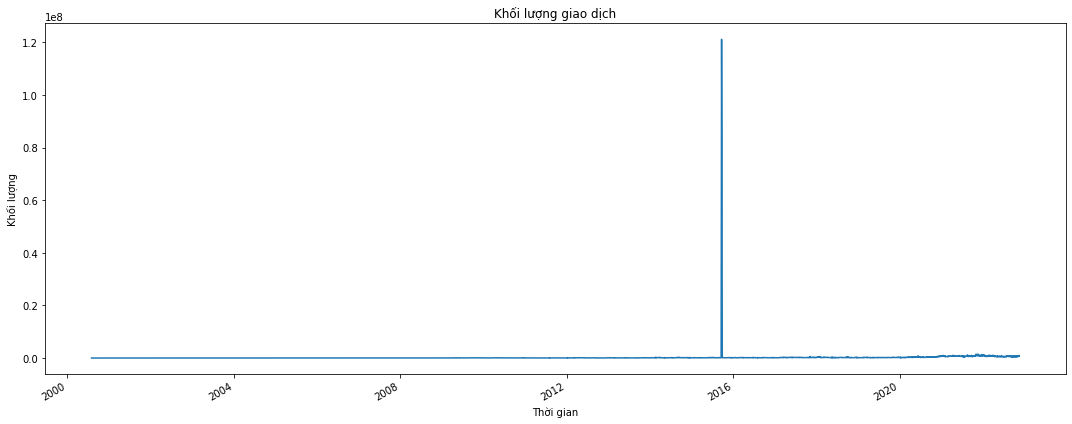

In [23]:
plt.figure(figsize=(15, 6))

df['KL'].plot()
plt.ylabel('Khối lượng')
plt.xlabel('Thời gian')
plt.title(f"Khối lượng giao dịch")

plt.tight_layout()

## Nhận xét:
- Ta nhận thấy dữ liệu tại thời điểm đóng cửa, mở cửa, cao nhất và thấp nhất tương tự nhau => ta chỉ lấy một thời điểm để huấn luyện mô hình

- Do dữ liệu khối lượng giao dịch cũng tương tự nhau trong suốt tiến trình thời gian => không sử dụng.

Như vậy, trong bài này ta sẽ sử dụng điểm tại thời điểm đóng cửa để dự đoán chính nó ở thời điểm tương lai


# Huấn luyện mô hình

## Lấy dữ liệu, convert dữ liệu từ dataframe sang numpy array

In [24]:
df_1 = df.filter(['Lần cuối'])

dataset = df_1.values

training_data_len = int(np.ceil( len(dataset) * .9 ))

training_data_len

4873

### Chuẩn hóa dữ liệu

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00128239],
       [0.00255778],
       ...,
       [0.5678617 ],
       [0.58958529],
       [0.60805735]])

### Tạo tập huấn luyện

In [26]:
train_data = scaled_data[0:int(training_data_len), :]


# Chia data thành x_train và y_train
# Lấy 60 ngày trước để dự đoán ngày thứ 61

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert thành numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("***")
print(x_train.shape)

[array([0.        , 0.00128239, 0.00255778, 0.00376309, 0.0049684 ,
       0.0061737 , 0.00737901, 0.00858432, 0.00978963, 0.01099494,
       0.01220025, 0.01211616, 0.01082676, 0.00953035, 0.008283  ,
       0.00768034, 0.00759625, 0.00880156, 0.01018206, 0.01155555,
       0.01166066, 0.01167468, 0.0120601 , 0.01221426, 0.01271181,
       0.01342658, 0.01357374, 0.01372791, 0.01447772, 0.01596334,
       0.01744895, 0.01893456, 0.02043419, 0.02193382, 0.02346849,
       0.02452664, 0.02489804, 0.02664293, 0.0275329 , 0.0292778 ,
       0.0310297 , 0.03294978, 0.03487688, 0.03681098, 0.03874508,
       0.04067918, 0.04261328, 0.04495382, 0.04482768, 0.04528318,
       0.04488374, 0.04707713, 0.04927752, 0.0514709 , 0.05366428,
       0.05585766, 0.06194027, 0.05811411, 0.0603145 , 0.06276016])]
[0.06538100377009433]

[array([0.        , 0.00128239, 0.00255778, 0.00376309, 0.0049684 ,
       0.0061737 , 0.00737901, 0.00858432, 0.00978963, 0.01099494,
       0.01220025, 0.01211616, 0.01

## Tạo tập kiểm định

In [27]:
test_data = scaled_data[training_data_len - 60: , :]

# Tạo tập x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert sang dạng numpy array
x_test = np.array(x_test)

# Reshape 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## MLP

In [28]:
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import regularizers, optimizers
from keras.models import Sequential
import time

mlp = Sequential()

mlp.add(Dense(units=3000, activation='relu', input_dim=x_train.shape[1]))
mlp.add(Dense(units=3000, activation='relu'))
mlp.add(Dense(units=3000, activation='relu'))
mlp.add(Dense(units=3000, activation='relu'))
mlp.add(Dense(units=3000, activation='relu'))

mlp.add(Dense(1))


opt = optimizers.RMSprop(lr=0.001)

mlp.compile(optimizer=opt, loss='mse', metrics=['mean_squared_error'])

start = time.time()
mlp.fit(x_train, y_train, epochs=30)
end = time.time()

print(f"Thời gian training mạng MLP là: {(end - start)} s")

Epoch 1/30


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 93/151 [=================>............] - ETA: 18s - loss: 642.5375 - mean_squared_error: 642.5375

## RNN

In [ ]:
from keras.layers import Dense, SimpleRNN

# Build the LSTM model
rnn = Sequential()
rnn.add(SimpleRNN(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
rnn.add(SimpleRNN(64, return_sequences=False))
rnn.add(Dense(25))
rnn.add(Dense(1))

# Compile the model
rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
start = time.time()
rnn.fit(x_train, y_train, batch_size=32, epochs=30)
end = time.time()

print(f"Thời gian training mạng MLP là: {(end - start)} s")

Epoch 1/30
151/151 [==============================] - 5s 22ms/step - loss: 0.0158
Epoch 2/30
151/151 [==============================] - 3s 19ms/step - loss: 2.6371e-04
Epoch 3/30
151/151 [==============================] - 3s 18ms/step - loss: 2.7646e-04
Epoch 4/30
151/151 [==============================] - 3s 18ms/step - loss: 2.0335e-04
Epoch 5/30
151/151 [==============================] - 3s 17ms/step - loss: 1.9906e-04
Epoch 6/30
151/151 [==============================] - 3s 18ms/step - loss: 1.8696e-04
Epoch 7/30
151/151 [==============================] - 3s 17ms/step - loss: 1.9709e-04
Epoch 8/30
151/151 [==============================] - 3s 18ms/step - loss: 1.6674e-04
Epoch 9/30
151/151 [==============================] - 3s 18ms/step - loss: 1.7630e-04
Epoch 10/30
151/151 [==============================] - 3s 18ms/step - loss: 1.2980e-04
Epoch 11/30
151/151 [==============================] - 3s 17ms/step - loss: 1.5804e-04
Epoch 12/30
151/151 [==============================] - 3

### Đánh giá mô hình

MLP

In [ ]:
pred_mlp = mlp.predict(x_test)
pred_mlp = scaler.inverse_transform(pred_mlp)
rmse = np.sqrt(np.mean(((pred_mlp - y_test) ** 2)))
rmse

201.0498065512261

RNN

In [ ]:
pred_rnn = rnn.predict(x_test)
pred_rnn = scaler.inverse_transform(pred_rnn)
rmse = np.sqrt(np.mean(((pred_rnn - y_test) ** 2)))
rmse

22.64501671439881

## Đồ thị dự đoán

MLP

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6848\2433110698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_mlp


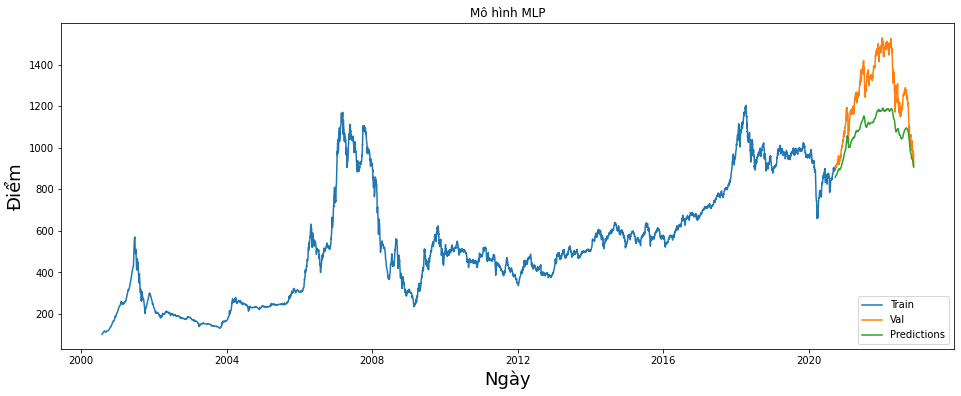

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = pred_mlp
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Mô hình MLP')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm', fontsize=18)
plt.plot(train['Lần cuối'])
plt.plot(valid[['Lần cuối', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

RNN

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6848\2773231552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_rnn


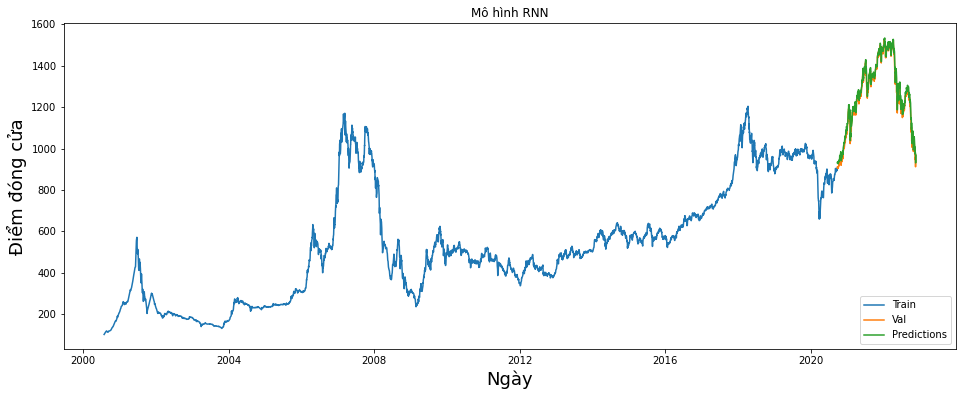

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = pred_rnn
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Mô hình RNN')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(train['Lần cuối'])
plt.plot(valid[['Lần cuối', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Xử lý hiện tượng overfiting

 MLP

In [ ]:
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import regularizers, optimizers
import time

mlp = Sequential()

mlp.add(Dense(units=3000, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=regularizers.l2(0.001)))
mlp.add(Dropout(0.2))

mlp.add(Dense(units=3000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
mlp.add(Dropout(0.2))

mlp.add(Dense(units=3000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
mlp.add(Dropout(0.2))

mlp.add(Dense(units=3000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
mlp.add(Dropout(0.2))

mlp.add(Dense(units=3000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
mlp.add(Dropout(0.2))

mlp.add(Dense(1))

opt = optimizers.RMSprop(lr=0.001)
mlp.compile(optimizer=opt, loss='mse', metrics=['mean_squared_error'])

mlp.fit(x_train, y_train, epochs=30)

Epoch 1/30


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


151/151 [==============================] - 66s 424ms/step - loss: 441.7566 - mean_squared_error: 438.4033
Epoch 2/30
151/151 [==============================] - 72s 477ms/step - loss: 0.8500 - mean_squared_error: 0.0190
Epoch 3/30
151/151 [==============================] - 59s 392ms/step - loss: 0.0259 - mean_squared_error: 0.0122
Epoch 4/30
151/151 [==============================] - 57s 375ms/step - loss: 0.0198 - mean_squared_error: 0.0085
Epoch 5/30
151/151 [==============================] - 69s 456ms/step - loss: 0.0181 - mean_squared_error: 0.0073
Epoch 6/30
151/151 [==============================] - 71s 472ms/step - loss: 0.0168 - mean_squared_error: 0.0061
Epoch 7/30
151/151 [==============================] - 76s 505ms/step - loss: 0.0164 - mean_squared_error: 0.0059
Epoch 8/30
151/151 [==============================] - 83s 547ms/step - loss: 0.0163 - mean_squared_error: 0.0059
Epoch 9/30
151/151 [==============================] - 55s 365ms/step - loss: 0.0160 - mean_squared_erro

RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

rnn = Sequential()
rnn.add(SimpleRNN(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
rnn.add(SimpleRNN(64, return_sequences=False))
rnn.add(Dense(25))
rnn.add(Dropout(0.2))
rnn.add(Dense(1))

# Compile the model
rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
start = time.time()
rnn.fit(x_train, y_train, batch_size=32, epochs=30)
end = time.time()

Epoch 1/30
151/151 [==============================] - 6s 25ms/step - loss: 0.0779
Epoch 2/30
151/151 [==============================] - 4s 25ms/step - loss: 0.0032
Epoch 3/30
151/151 [==============================] - 4s 24ms/step - loss: 0.0026
Epoch 4/30
151/151 [==============================] - 3s 23ms/step - loss: 0.0022
Epoch 5/30
151/151 [==============================] - 3s 23ms/step - loss: 0.0024
Epoch 6/30
151/151 [==============================] - 3s 22ms/step - loss: 0.0020
Epoch 7/30
151/151 [==============================] - 3s 23ms/step - loss: 0.0020
Epoch 8/30
151/151 [==============================] - 3s 22ms/step - loss: 0.0019
Epoch 9/30
151/151 [==============================] - 3s 22ms/step - loss: 0.0016
Epoch 10/30
151/151 [==============================] - 4s 24ms/step - loss: 0.0014
Epoch 11/30
151/151 [==============================] - 3s 22ms/step - loss: 0.0015
Epoch 12/30
151/151 [==============================] - 3s 21ms/step - loss: 0.0013
Epoch 13/30
1

### Đánh giá mô hình

MLP

In [ ]:
pred_mlp = mlp.predict(x_test)
pred_mlp = scaler.inverse_transform(pred_mlp)
rmse = np.sqrt(np.mean(((pred_mlp - y_test) ** 2)))
rmse

349.3426897193438

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6848\754887292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_mlp


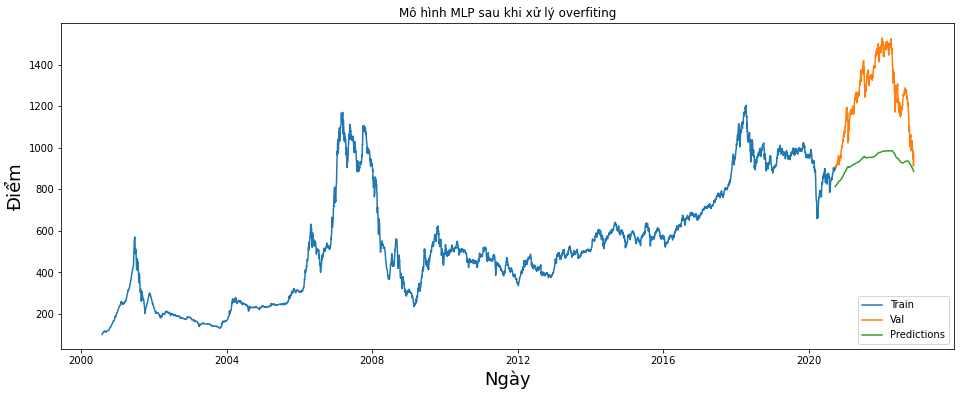

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = pred_mlp
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Mô hình MLP sau khi xử lý overfiting')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm', fontsize=18)
plt.plot(train['Lần cuối'])
plt.plot(valid[['Lần cuối', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

RNN

In [ ]:
pred_rnn = rnn.predict(x_test)
pred_rnn = scaler.inverse_transform(pred_rnn)
rmse = np.sqrt(np.mean(((pred_rnn - y_test) ** 2)))
rmse

30.03559478781199

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6848\4179211544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_rnn


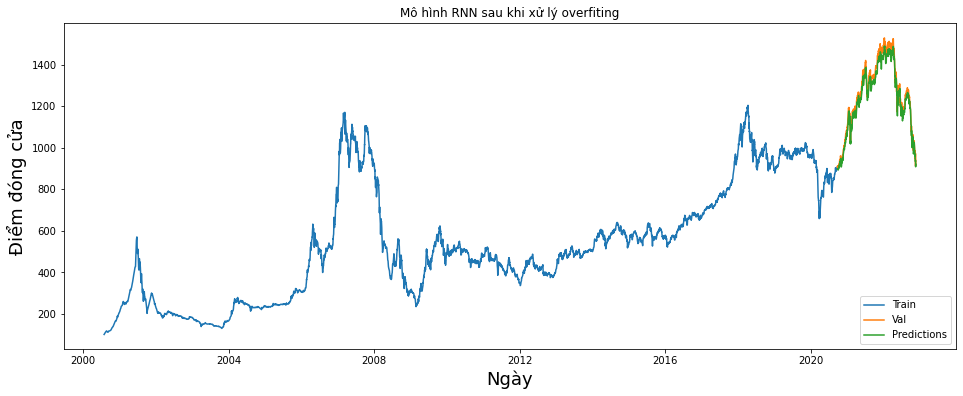

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = pred_rnn
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Mô hình RNN sau khi xử lý overfiting')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(train['Lần cuối'])
plt.plot(valid[['Lần cuối', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Thêm mô hình LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
lstm = Sequential()
lstm.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
lstm.add(LSTM(64, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

# Compile the model
lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm.fit(x_train, y_train, batch_size=32, epochs=40)

Epoch 1/40
151/151 [==============================] - 12s 53ms/step - loss: 0.0022
Epoch 2/40
151/151 [==============================] - 9s 58ms/step - loss: 2.6979e-04
Epoch 3/40
151/151 [==============================] - 11s 72ms/step - loss: 2.1689e-04
Epoch 4/40
151/151 [==============================] - 8s 53ms/step - loss: 2.1401e-04
Epoch 5/40
151/151 [==============================] - 9s 57ms/step - loss: 1.9324e-04
Epoch 6/40
151/151 [==============================] - 9s 58ms/step - loss: 1.7791e-04
Epoch 7/40
151/151 [==============================] - 8s 53ms/step - loss: 1.4276e-04
Epoch 8/40
151/151 [==============================] - 9s 59ms/step - loss: 1.4919e-04
Epoch 9/40
151/151 [==============================] - 9s 61ms/step - loss: 1.1493e-04
Epoch 10/40
151/151 [==============================] - 9s 56ms/step - loss: 1.1499e-04
Epoch 11/40
151/151 [==============================] - 8s 53ms/step - loss: 1.0807e-04
Epoch 12/40
151/151 [==============================] -

In [ ]:
pred_lstm = lstm.predict(x_test)
pred_lstm = scaler.inverse_transform(pred_lstm)
rmse = np.sqrt(np.mean(((pred_lstm - y_test) ** 2)))
rmse

30.05562894011454

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6848\1050725224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_lstm


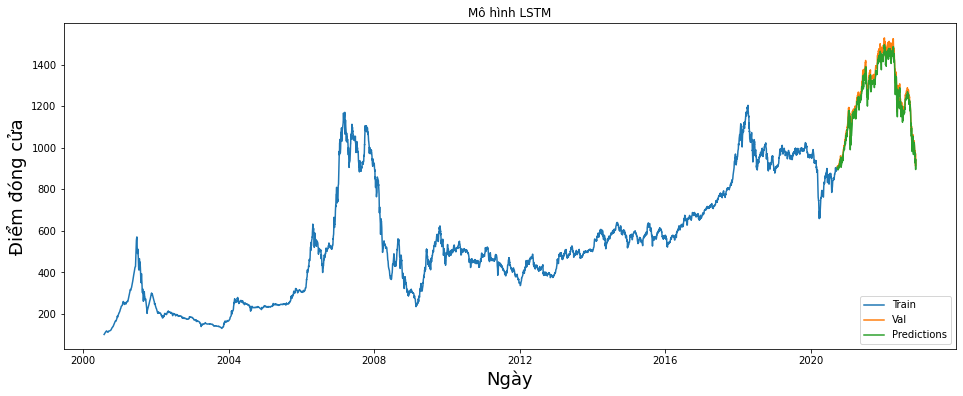

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = pred_lstm
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Mô hình LSTM')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(train['Lần cuối'])
plt.plot(valid[['Lần cuối', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Dự đoán giá chứng khoán cho** n** ngày tiếp theo

In [ ]:
dataset_test = df['Lần cuối'][len(df)-60:len(df)].to_numpy()
dataset_test = np.array(dataset_test)

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

## Chọn số ngày cần dự đoán tiếp theo

LSTM

In [ ]:
n = 7 # số ngày dự đoán

Chỉ số VN Index 7 ngày tiếp theo là: 
Ngày thứ 1:  582.8188
Ngày thứ 2:  578.2945
Ngày thứ 3:  573.84125
Ngày thứ 4:  569.4573
Ngày thứ 5:  565.1408
Ngày thứ 6:  560.8903
Ngày thứ 7:  556.70435


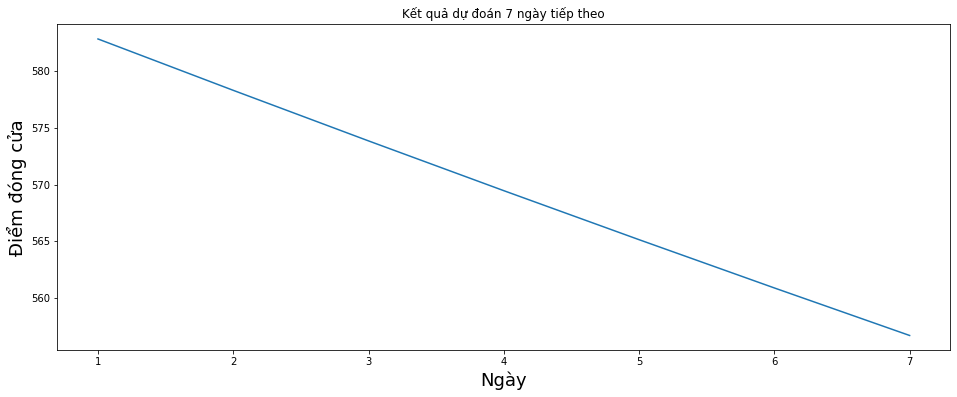

In [ ]:
i = 0
x =[]
y =[]
print(f'Chỉ số VN Index {n} ngày tiếp theo là: ')
while i < n:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = lstm.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    print(f'Ngày thứ {i+1}: ', predicted_stock_price[0][0])
    x.append(i+1)
    y.append(predicted_stock_price[0][0])
    i = i +1
    
plt.figure(figsize=(16,6))
plt.title(f'Kết quả dự đoán {n} ngày tiếp theo')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(x,y)
plt.show()


In [ ]:
n = 49

Chỉ số VN Index 49 ngày tiếp theo là: 
Ngày thứ 1:  552.5814
Ngày thứ 2:  548.5202
Ngày thứ 3:  544.5196
Ngày thứ 4:  540.5782
Ngày thứ 5:  536.6949
Ngày thứ 6:  532.86865
Ngày thứ 7:  529.09845
Ngày thứ 8:  525.3834
Ngày thứ 9:  521.7226
Ngày thứ 10:  518.1151
Ngày thứ 11:  514.5601
Ngày thứ 12:  511.05682
Ngày thứ 13:  507.60452
Ngày thứ 14:  504.20255
Ngày thứ 15:  500.85007
Ngày thứ 16:  497.5464
Ngày thứ 17:  494.29095
Ngày thứ 18:  491.0831
Ngày thứ 19:  487.9222
Ngày thứ 20:  484.80774
Ngày thứ 21:  481.73914
Ngày thứ 22:  478.71585
Ngày thứ 23:  475.73727
Ngày thứ 24:  472.80298
Ngày thứ 25:  469.91235
Ngày thứ 26:  467.06494
Ngày thứ 27:  464.2603
Ngày thứ 28:  461.49796
Ngày thứ 29:  458.7774
Ngày thứ 30:  456.0982
Ngày thứ 31:  453.45987
Ngày thứ 32:  450.86197
Ngày thứ 33:  448.30408
Ngày thứ 34:  445.7857
Ngày thứ 35:  443.30646
Ngày thứ 36:  440.86597
Ngày thứ 37:  438.46384
Ngày thứ 38:  436.09955
Ngày thứ 39:  433.77277
Ngày thứ 40:  431.4831
Ngày thứ 41:  429.23
Ngày t

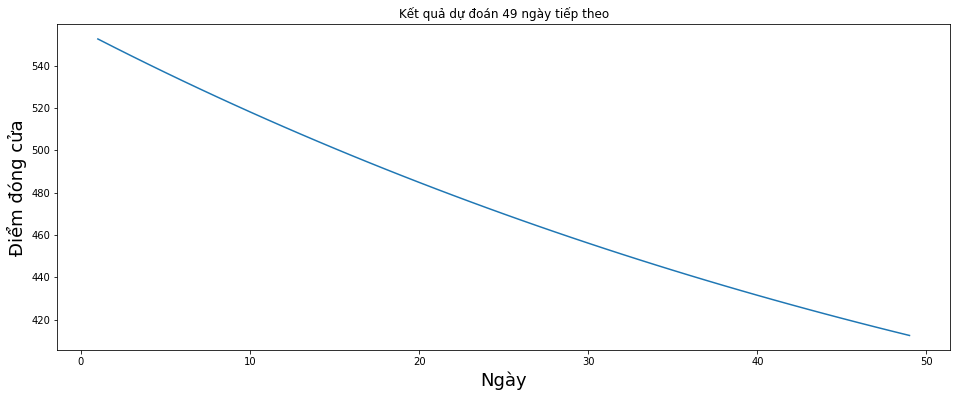

In [ ]:
i = 0
x =[]
y =[]
print(f'Chỉ số VN Index {n} ngày tiếp theo là: ')
while i < n:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = lstm.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    print(f'Ngày thứ {i+1}: ', predicted_stock_price[0][0])
    x.append(i+1)
    y.append(predicted_stock_price[0][0])
    i = i +1
    
plt.figure(figsize=(16,6))
plt.title(f'Kết quả dự đoán {n} ngày tiếp theo')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(x,y)
plt.show()

RNN

In [ ]:
n = 7

Chỉ số VN Index 7 ngày tiếp theo là: 
Ngày thứ 1:  405.68204
Ngày thứ 2:  399.6643
Ngày thứ 3:  392.9966
Ngày thứ 4:  386.3549
Ngày thứ 5:  379.39264
Ngày thứ 6:  372.088
Ngày thứ 7:  364.99277


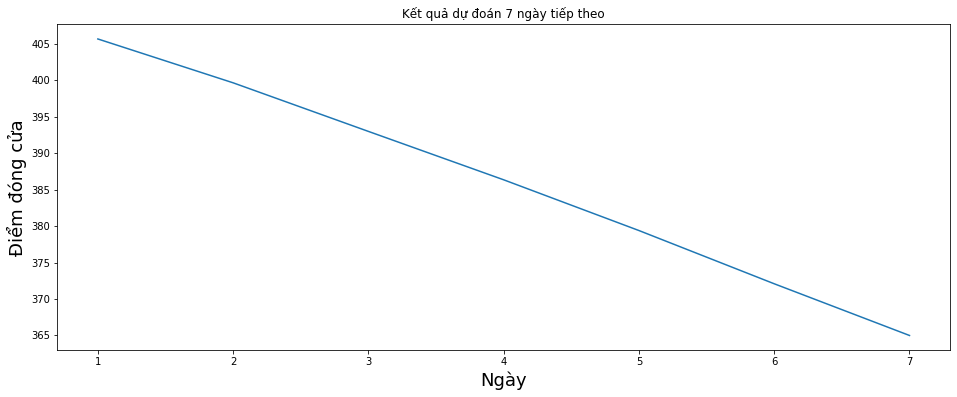

In [ ]:
i = 0
x =[]
y =[]
print(f'Chỉ số VN Index {n} ngày tiếp theo là: ')
while i < n:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = rnn.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    print(f'Ngày thứ {i+1}: ', predicted_stock_price[0][0])
    x.append(i+1)
    y.append(predicted_stock_price[0][0])
    i = i +1
    
plt.figure(figsize=(16,6))
plt.title(f'Kết quả dự đoán {n} ngày tiếp theo')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(x,y)

In [ ]:
n = 49

Chỉ số VN Index 49 ngày tiếp theo là: 
Ngày thứ 1:  363.17923
Ngày thứ 2:  361.12012
Ngày thứ 3:  359.30542
Ngày thứ 4:  357.7031
Ngày thứ 5:  356.2809
Ngày thứ 6:  355.01172
Ngày thứ 7:  353.86844
Ngày thứ 8:  352.82437
Ngày thứ 9:  351.85486
Ngày thứ 10:  350.93924
Ngày thứ 11:  350.06122
Ngày thứ 12:  349.2094
Ngày thứ 13:  348.3765
Ngày thứ 14:  347.55853
Ngày thứ 15:  346.7541
Ngày thứ 16:  345.9633
Ngày thứ 17:  345.18726
Ngày thứ 18:  344.42734
Ngày thứ 19:  343.685
Ngày thứ 20:  342.9615
Ngày thứ 21:  342.25754
Ngày thứ 22:  341.57364
Ngày thứ 23:  340.90985
Ngày thứ 24:  340.2659
Ngày thứ 25:  339.64133
Ngày thứ 26:  339.03537
Ngày thứ 27:  338.44714
Ngày thứ 28:  337.87573
Ngày thứ 29:  337.32034
Ngày thứ 30:  336.78
Ngày thứ 31:  336.25385
Ngày thứ 32:  335.7411
Ngày thứ 33:  335.24103
Ngày thứ 34:  334.753
Ngày thứ 35:  334.2764
Ngày thứ 36:  333.81076
Ngày thứ 37:  333.3556
Ngày thứ 38:  332.91055
Ngày thứ 39:  332.47525
Ngày thứ 40:  332.0494
Ngày thứ 41:  331.63278
Ngày 

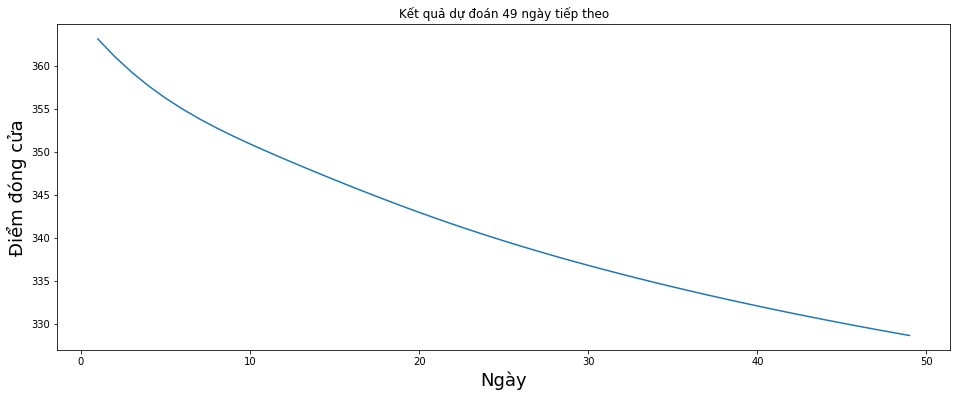

In [ ]:
i = 0
x =[]
y =[]
print(f'Chỉ số VN Index {n} ngày tiếp theo là: ')
while i < n:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = lstm.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    print(f'Ngày thứ {i+1}: ', predicted_stock_price[0][0])
    x.append(i+1)
    y.append(predicted_stock_price[0][0])
    i = i +1
    
plt.figure(figsize=(16,6))
plt.title(f'Kết quả dự đoán {n} ngày tiếp theo')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(x,y)

MLP

In [ ]:
n = 7

Chỉ số VN Index 7 ngày tiếp theo là: 
Ngày thứ 1:  284.9652
Ngày thứ 2:  281.79434
Ngày thứ 3:  278.5818
Ngày thứ 4:  275.4763
Ngày thứ 5:  272.38995
Ngày thứ 6:  269.3767
Ngày thứ 7:  266.3556


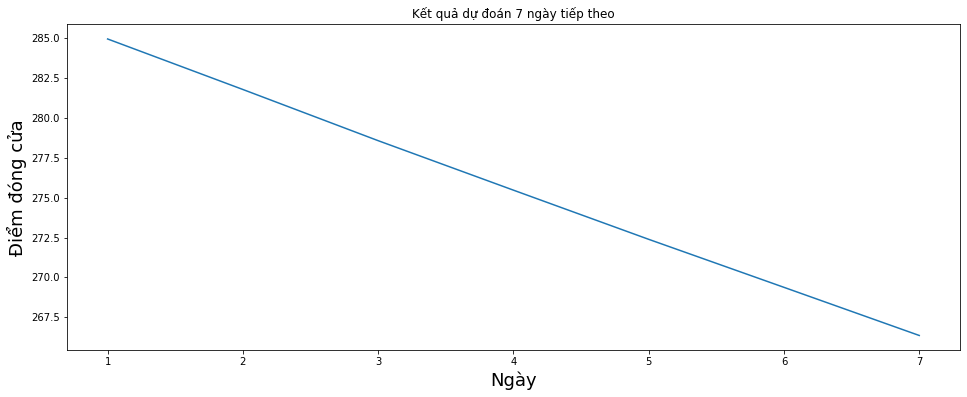

In [ ]:
i = 0
x =[]
y =[]
print(f'Chỉ số VN Index {n} ngày tiếp theo là: ')
while i < n:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = mlp.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    print(f'Ngày thứ {i+1}: ', predicted_stock_price[0][0])
    x.append(i+1)
    y.append(predicted_stock_price[0][0])
    i = i +1
    
plt.figure(figsize=(16,6))
plt.title(f'Kết quả dự đoán {n} ngày tiếp theo')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(x,y)

In [ ]:
n = 49

Chỉ số VN Index 49 ngày tiếp theo là: 
Ngày thứ 1:  263.33304
Ngày thứ 2:  260.3138
Ngày thứ 3:  257.29294
Ngày thứ 4:  254.26447
Ngày thứ 5:  251.30733
Ngày thứ 6:  248.48036
Ngày thứ 7:  245.69208
Ngày thứ 8:  242.92049
Ngày thứ 9:  240.15422
Ngày thứ 10:  237.43404
Ngày thứ 11:  234.97551
Ngày thứ 12:  232.63686
Ngày thứ 13:  230.42265
Ngày thứ 14:  228.3501
Ngày thứ 15:  226.55966
Ngày thứ 16:  225.0385
Ngày thứ 17:  223.98586
Ngày thứ 18:  223.34096
Ngày thứ 19:  222.93387
Ngày thứ 20:  222.76263
Ngày thứ 21:  222.71889
Ngày thứ 22:  222.69867
Ngày thứ 23:  222.68768
Ngày thứ 24:  222.68234
Ngày thứ 25:  222.67857
Ngày thứ 26:  222.6772
Ngày thứ 27:  222.6764
Ngày thứ 28:  222.67575
Ngày thứ 29:  222.67538
Ngày thứ 30:  222.67522
Ngày thứ 31:  222.67505
Ngày thứ 32:  222.67494
Ngày thứ 33:  222.67488
Ngày thứ 34:  222.67482
Ngày thứ 35:  222.67482
Ngày thứ 36:  222.67482
Ngày thứ 37:  222.67482
Ngày thứ 38:  222.67482
Ngày thứ 39:  222.67482
Ngày thứ 40:  222.67482
Ngày thứ 41:  2

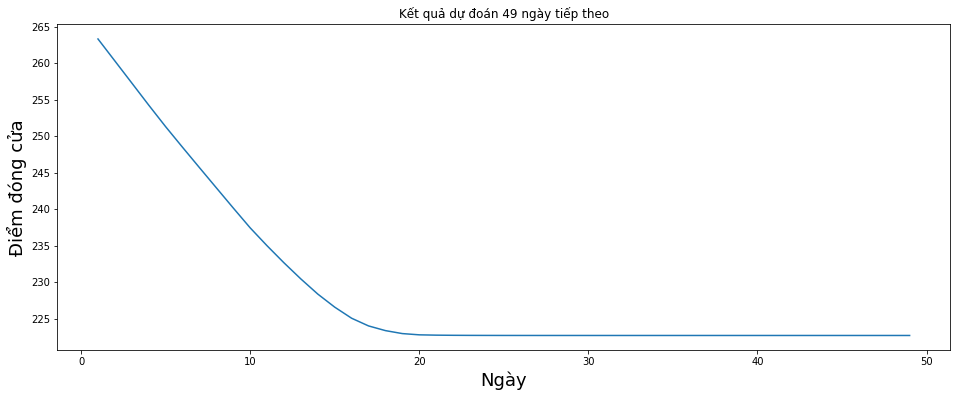

In [ ]:
i = 0
x =[]
y =[]
print(f'Chỉ số VN Index {n} ngày tiếp theo là: ')
while i < n:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = mlp.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    print(f'Ngày thứ {i+1}: ', predicted_stock_price[0][0])
    x.append(i+1)
    y.append(predicted_stock_price[0][0])
    i = i +1
    
plt.figure(figsize=(16,6))
plt.title(f'Kết quả dự đoán {n} ngày tiếp theo')
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Điểm đóng cửa', fontsize=18)
plt.plot(x,y)